# 📊 Estatística Aplicada: Salários em Data Science

- Nível: Intermediário Técnico
- Tipo: Aula prática com dados simulados
- Relação: Não-linear leve + ruído moderado

## 01. Data Set

🎯 Estrutura dos dados:

- 300 profissionais  
- anos_experiencia  
- performance_score  
- salario  

Relação estrutural do salário:

$$
salario = 3000 + 1200 \cdot experiencia + 150 \cdot experiencia^2 + ruído
$$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(42)

n = 300

# Experiência (0 a 15 anos)

anos_experiencia = np.random.uniform(0, 15, n)

# Performance correlacionada com experiência + ruído
performance = 60 + 2 * anos_experiencia + np.random.normal(0, 5, n)

# Relação não-linear leve para salário
salario = (
    3000 
    + 1200 * anos_experiencia 
    + 150 * (anos_experiencia ** 2)
    + np.random.normal(0, 4000, n)
)

df = pd.DataFrame({
    "anos_experiencia": anos_experiencia,
    "performance_score": performance,
    "salario": salario
})

# Inserindo outliers salariais artificiais
outliers_index = np.random.choice(df.index, 5, replace=False)
df.loc[outliers_index, "salario"] *= 3

df.head()

,anos_experiencia,performance_score,salario
0,5.618102,71.464063,14211.863091
1,14.260715,85.263427,45773.989835
2,10.979909,92.679539,31652.307188
3,8.979877,81.129350,26061.176749
4,2.340280,54.554846,3188.218362


## 📊 2️⃣ Média

### 📘 Definição Técnica

$$\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_i$$

A média é o centro de massa da distribuição.

---

### 🧠 Definição Intuitiva

Se somarmos todos os salários e dividirmos igualmente entre todos, esse seria o valor médio.

In [6]:
media_salario = df["salario"].mean()
media_salario

np.float64(24351.217013856465)

## 📊 3️⃣ Mediana e Quantis

### 📘 Definição Técnica
O quantil $Q_2$ corresponde à mediana.

$$Q_p = \text{valor abaixo do qual } p\% \text{ dos dados estão}$$

---

### 🧠 Definição Intuitiva
A **mediana** é o "divisor de águas" do seu conjunto de dados: se você colocar todos os valores em ordem (do menor para o maior), ela é exatamente o valor que está no meio. 

* **50%** dos dados são menores ou iguais a ela.
* **50%** dos dados são maiores ou iguais a ela.

In [9]:
mediana_salario = df["salario"].median()
q1 = df["salario"].quantile(0.25)
q2 = df["salario"].quantile(0.50)
q3 = df["salario"].quantile(0.75)

print(f"Verificando a mediana: {mediana_salario}")
print(f"Verificando o Q1: {q1}")
print(f"Verificando o Q2: {q2}")
print(f"Verificando o Q3: {q3}")

Verificando a mediana: 21167.779936970423
Verificando o Q1: 9958.050723098848
Verificando o Q2: 21167.779936970423
Verificando o Q3: 36302.236542556944


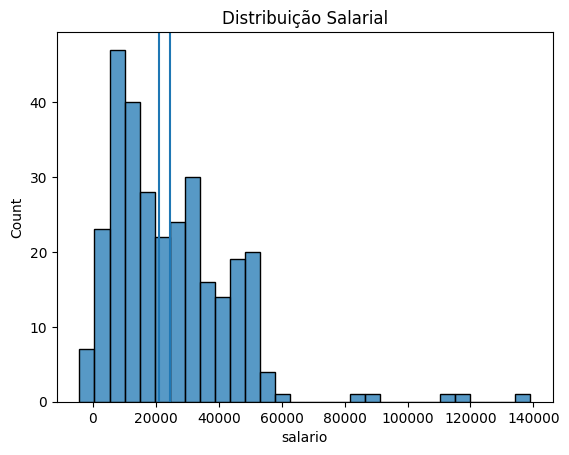

In [10]:
plt.figure()
sns.histplot(df["salario"], bins=30)
plt.axvline(media_salario)
plt.axvline(mediana_salario)
plt.title("Distribuição Salarial")
plt.show()

## 🚨 4️⃣ Outliers (Valores Atípicos)

### 📘 Critério IQR (Amplitude Interquartílica)
O **IQR** mede a dispersão dos 50% centrais dos seus dados.

$$IQR = Q_3 - Q_1$$

---

### 📏 Regra de Detecção (Tukey's Fences)
Valores que ultrapassam os limites abaixo são considerados potenciais *outliers*:

* **Limite Inferior:** $LI = Q_1 - 1.5 \times IQR$
* **Limite Superior:** $LS = Q_3 + 1.5 \times IQR$

> **Nota:** Qualquer dado $x$ tal que $x < LI$ ou $x > LS$ deve ser investigado.

In [12]:
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = df[(df["salario"] < limite_inferior) | 
              (df["salario"] > limite_superior)]

len(outliers)

5

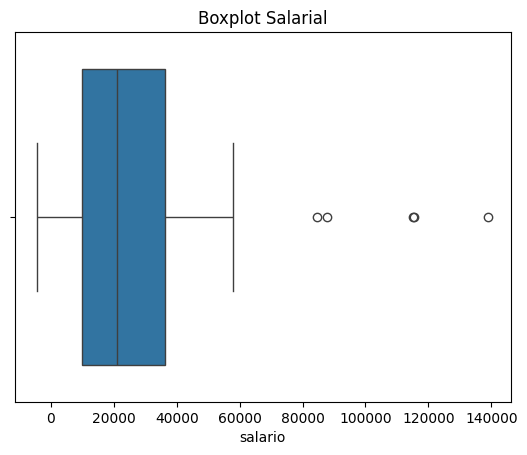

In [13]:
plt.figure()
sns.boxplot(x=df["salario"])
plt.title("Boxplot Salarial")
plt.show()

## 📈 5️⃣ Variância e Desvio Padrão

### 📘 Definição Técnica (Populacional)

A **Variância** ($\sigma^2$) é a média dos quadrados dos desvios em relação à média:

$$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

O **Desvio Padrão** ($\sigma$) é a raiz quadrada da variância, trazendo a unidade de medida de volta à escala original:

$$\sigma = \sqrt{\sigma^2}$$

---

### 🧠 Definição Intuitiva

Pense no desvio padrão como o **"erro médio"** em relação ao centro:
* **Desvio Baixo:** Os valores estão todos "agrupados" perto da média (ex: salários muito parecidos).
* **Desvio Alto:** Os valores estão "espalhados" (ex: uma empresa com estagiários e CEOs, gerando grande desigualdade).

In [16]:
variancia = df["salario"].var()
desvio = df["salario"].std()

print(f"Retornando a variancia: {variancia}")
print(f"Retornando o desvio: {desvio}")

Retornando a variancia: 362549288.39060163
Retornando o desvio: 19040.72709721458


## 🔗 6️⃣ Covariância

### 📘 Definição Técnica
A **Covariância** ($\text{Cov}(X, Y)$) mede como duas variáveis variam juntas. Ela indica a **direção** da relação linear entre elas:

$$\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$

---

### 🧠 Interpretação Rápida
* **Covariância Positiva ($> 0$):** Quando $X$ aumenta, $Y$ tende a aumentar (direção comum).
* **Covariância Negativa ($< 0$):** Quando $X$ aumenta, $Y$ tende a diminuir (direção oposta).
* **Covariância Próxima de Zero:** Não há uma relação linear clara entre as variáveis.

> **⚠️ Importante:** A covariância depende da escala das unidades (ex: metros vs. centímetros), por isso usamos a **Correlação de Pearson** para ter um valor padronizado entre -1 e 1.

In [18]:
cov = df[["anos_experiencia", "salario"]].cov()
cov

,anos_experiencia,salario
anos_experiencia,19.493179,7.039141e+04
salario,70391.405357,3.625493e+08


## 📊 7️⃣ Correlação (Pearson)

### 📘 Definição Técnica
A correlação ($\rho$) é a **Covariância Normalizada**. Ela mede a força e a direção da relação linear entre duas variáveis.

$$\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$$

---

### 📏 Escala de Interpretação
Diferente da covariância, a correlação é sempre um valor entre **-1 e 1**:

* **+1:** Correlação positiva perfeita (sobem juntas em linha reta).
* **0:** Ausência de relação linear.
* **-1:** Correlação negativa perfeita (uma sobe, a outra desce em linha reta).

> **💡 Dica:** No Pandas, você calcula toda a matriz de correlação do seu DataFrame usando apenas `df.corr()`.

In [20]:
correlacao = df["anos_experiencia"].corr(df["salario"])
print(f"Verificando a correlação: {correlacao}")

Verificando a correlação: 0.8373263663740489


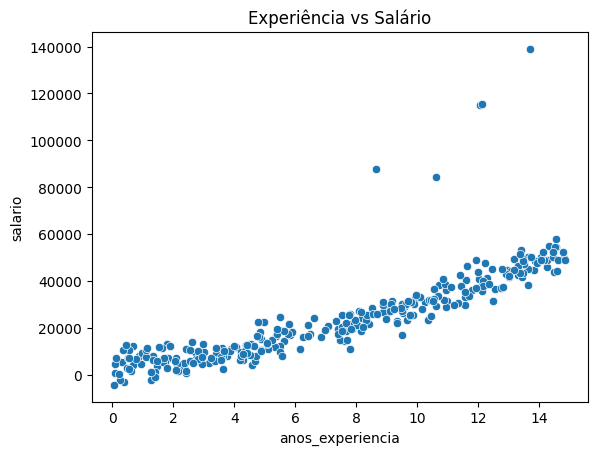

In [21]:
plt.figure()
sns.scatterplot(x="anos_experiencia", y="salario", data=df)
plt.title("Experiência vs Salário")
plt.show()

## 🧠 8️⃣ Causalidade vs. Correlação

### 🚀 Desafio: Elevando o Nível
A correlação diz que duas coisas andam juntas, mas a **Causalidade** busca entender quem "empurra" quem. 

---

### ❓ Perguntas para a Turma:

* [ ] **Experiência causa salário?** *Existe uma relação direta ou há outros fatores em jogo?*
* [ ] **Performance pode ser uma variável mediadora?** *A experiência aumenta a performance, que por sua vez aumenta o salário?*
* [ ] **O que acontece se controlarmos a performance?** *Pessoas com a mesma performance, mas experiências diferentes, ganham salários diferentes?*
* [ ] **Precisaríamos de um experimento?** *Como isolar essas variáveis sem um Teste A/B ou um ambiente controlado?*

---

### 💡 Conceito Chave: O Gráfico Acíclico Dirigido (DAG)
Para entender causalidade, desenhamos o caminho das setas:
> **Experiência $\rightarrow$ Performance $\rightarrow$ Salário**



> **Aviso:** "Correlação não implica causalidade". O fato de as vendas de sorvete e os ataques de tubarão subirem juntos não significa que um causa o outro (o causador comum é o **Verão**!).

In [22]:
df[["anos_experiencia", "performance_score", "salario"]].corr()

,anos_experiencia,performance_score,salario
anos_experiencia,1.000000,0.881533,0.837326
performance_score,0.881533,1.000000,0.728846
salario,0.837326,0.728846,1.000000
